# 03. Introduction to Neural Networks

Welcome to the world of **neural networks**! 🧠

Now that you know how to work with tensors, let's use them to build something amazing: a neural network that can learn and make predictions!

## What You'll Learn

By the end of this notebook, you'll understand:

- **How to build neural networks** using PyTorch
- **Training a neural network** to make real predictions
- **Activation functions** and why they matter
- **Loss functions** and optimization
- **Practice exercises** to solidify your understanding

## Our Real-World Example: Exam Pass Prediction 🎓

Throughout this notebook, we'll build a neural network to predict whether a student will pass an exam based on:

- **Hours studied** (0-40 hours)
- **Previous knowledge** (1-10 scale)
- **Sleep hours** (4-12 hours)
- **Stress level** (1-10 scale)

Our goal: Predict **Pass (1)** or **Fail (0)**

Let's get started!


In [1]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set style
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## Load and Explore Our Dataset

Let's load the student exam data and see what we're working with!


In [3]:
# Load the data
df = pd.read_csv("../13_datasets/student_exams_advanced_data.csv")

print("📊 Student Exam Dataset")
print(f"Total students: {len(df)}")

📊 Student Exam Dataset
Total students: 80


In [4]:
df.head(10)

,hours_studied,previous_knowledge,sleep_hours,stress_level,passed
0,5,3,5,8,0
1,8,4,6,7,0
2,12,5,7,6,0
3,15,6,7,5,1
4,18,7,8,4,1
5,20,8,7,3,1
6,22,8,8,2,1
7,25,9,8,2,1
8,28,9,9,1,1
9,30,10,8,1,1


In [5]:
print("Class distribution:")
print(df["passed"].value_counts())
print(f"Pass rate: {df['passed'].mean():.2%}")

Class distribution:
passed
1    52
0    28
Name: count, dtype: int64
Pass rate: 65.00%


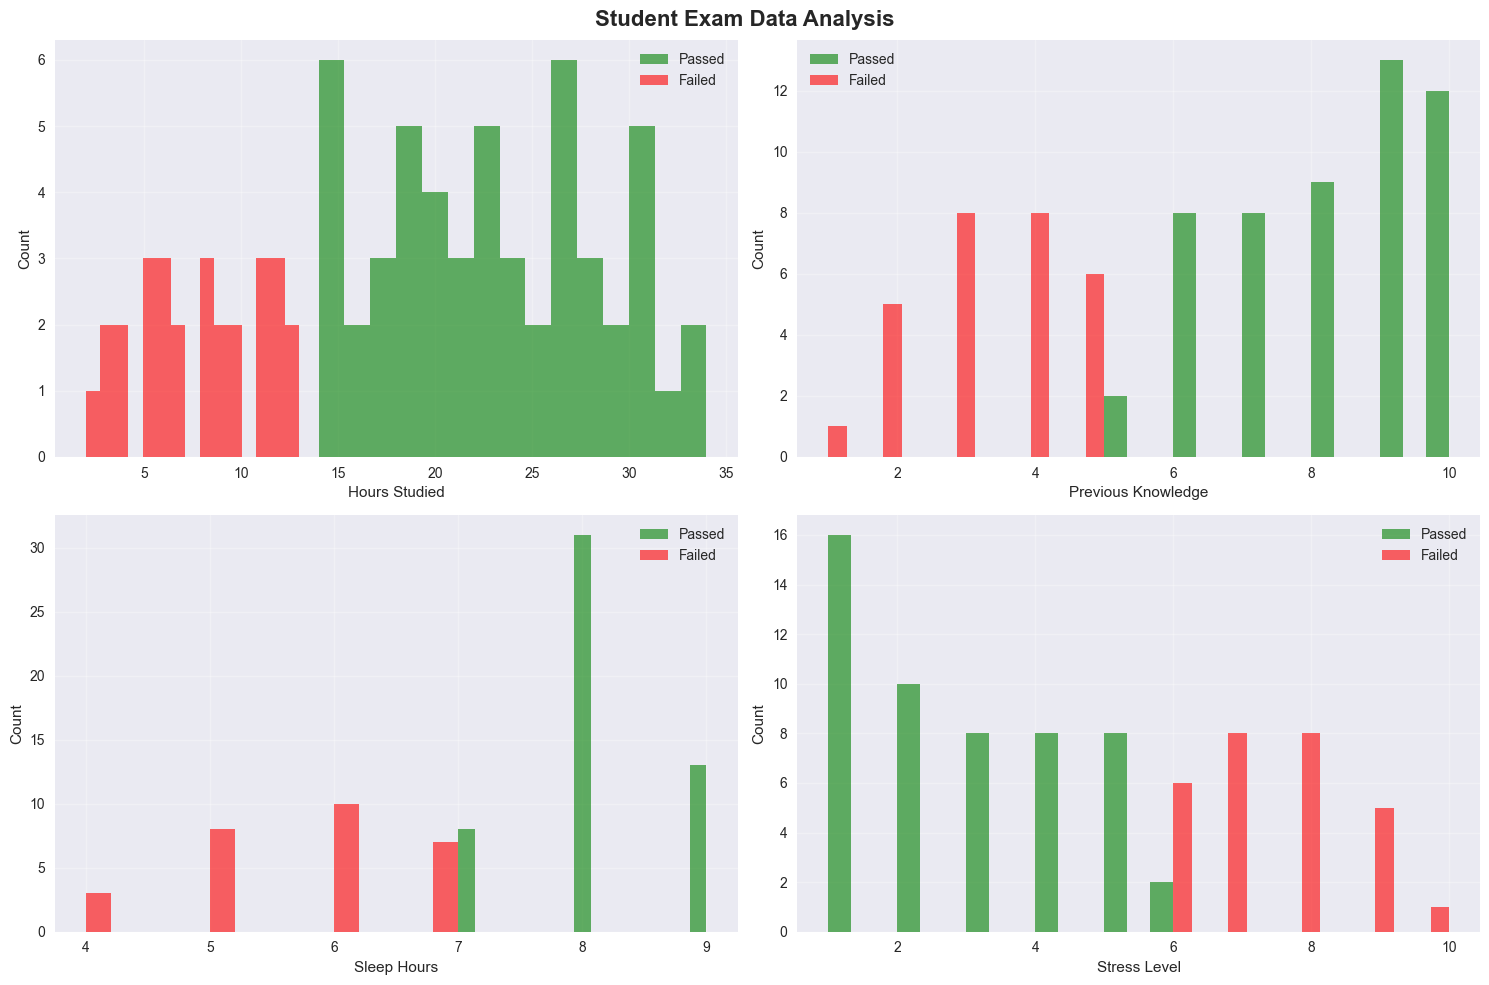

In [6]:
# Visualize the data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Student Exam Data Analysis", fontsize=16, fontweight="bold")

features = ["hours_studied", "previous_knowledge", "sleep_hours", "stress_level"]
titles = ["Hours Studied", "Previous Knowledge", "Sleep Hours", "Stress Level"]

for idx, (feature, title) in enumerate(zip(features, titles)):
    row, col = idx // 2, idx % 2

    # Separate by pass/fail
    passed = df[df["passed"] == 1][feature]
    failed = df[df["passed"] == 0][feature]

    axes[row, col].hist(passed, alpha=0.6, label="Passed", bins=15, color="green")
    axes[row, col].hist(failed, alpha=0.6, label="Failed", bins=15, color="red")
    axes[row, col].set_xlabel(title)
    axes[row, col].set_ylabel("Count")
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

🔍 Observations

- Students who passed tend to study more hours
- Higher previous knowledge correlates with passing
- Better sleep hours help with passing
- Lower stress levels are associated with passing


## Prepare Data for Neural Network

Before we can train a neural network, we need to:

1. **Split** the data into features (X) and labels (y)
2. **Normalize** the features (neural networks work better with scaled data)
3. **Split** into training and testing sets
4. **Convert** to PyTorch tensors


In [7]:
# Step 1: Split features and labels
X = df[["hours_studied", "previous_knowledge", "sleep_hours", "stress_level"]].values
y = df["passed"].values

print(f"Features (X) shape: {X.shape}")
print(f"Labels (y) shape: {y.shape}")

Features (X) shape: (80, 4)
Labels (y) shape: (80,)


In [8]:
# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 64 samples
Test set: 16 samples


In [9]:
# Step 3: Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Before scaling - Mean: {X_train.mean():.2f}, Std: {X_train.std():.2f}")
print(
    f"After scaling - Mean: {X_train_scaled.mean():.2f}, Std: {X_train_scaled.std():.2f}"
)

Before scaling - Mean: 9.12, Std: 7.01
After scaling - Mean: 0.00, Std: 1.00


In [10]:
# Step 4: Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1)

print("Tensor shapes:")
print(f"X_train_tensor: {X_train_tensor.shape}")
print(f"y_train_tensor: {y_train_tensor.shape}")
print("\n✅ Data prepared and ready for training!")

Tensor shapes:
X_train_tensor: torch.Size([64, 4])
y_train_tensor: torch.Size([64, 1])

✅ Data prepared and ready for training!


## Building a Neural Network with PyTorch

PyTorch makes building neural networks easy and powerful! It handles:

- **Automatic gradient computation** (backpropagation)
- **GPU acceleration** for faster training
- **Optimized operations** that are much faster than pure Python
- **Clean, intuitive code**

Let's build our student exam predictor!

### Method 1: Using `nn.Sequential` (Quick and Easy)

Perfect for simple, linear architectures where layers stack one after another.


In [11]:
# Create a simple sequential model
model_v1 = nn.Sequential(
    nn.Linear(in_features=4, out_features=8),  # Input layer: 4 inputs -> 8 neurons
    nn.ReLU(),  # Activation function
    nn.Linear(in_features=8, out_features=1),  # Output layer: 8 neurons -> 1 output
    nn.Sigmoid(),  # Sigmoid for binary classification
)

print("Model Architecture (Sequential):")
print("=" * 50)
print(model_v1)

Model Architecture (Sequential):
Sequential(
  (0): Linear(in_features=4, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
  (3): Sigmoid()
)


In [12]:
# Count parameters
total_params = sum(p.numel() for p in model_v1.parameters())
print(f"Total parameters: {total_params}")

# See parameter details
print("\nParameter breakdown:")
for name, param in model_v1.named_parameters():
    print(f"  {name}: {param.shape} = {param.numel()} parameters")

Total parameters: 49

Parameter breakdown:
  0.weight: torch.Size([8, 4]) = 32 parameters
  0.bias: torch.Size([8]) = 8 parameters
  2.weight: torch.Size([1, 8]) = 8 parameters
  2.bias: torch.Size([1]) = 1 parameters


### Method 2: Using `nn.Module` (More Flexible)


In [13]:
class StudentExamPredictor(nn.Module):
    """Custom neural network for predicting exam results"""

    def __init__(self, input_size=4, hidden_size=8, output_size=1):
        super().__init__()

        # Define layers
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)

        # Define activation functions
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        """Forward pass through the network"""
        # Input -> Hidden
        x = self.hidden(x)
        x = self.relu(x)

        # Hidden -> Output
        x = self.output(x)
        x = self.sigmoid(x)

        return x


# Create the model
model = StudentExamPredictor(input_size=4, hidden_size=8, output_size=1)

print("Custom Model Architecture:")
print("=" * 50)
print(model)

print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters())}")

Custom Model Architecture:
StudentExamPredictor(
  (hidden): Linear(in_features=4, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

Total parameters: 49


## Loss Function and Optimizer

To train our network, we need two more things:

### 1. Loss Function (How wrong are we?)

The loss function measures how far our predictions are from the true values.

For **binary classification**, we use **Binary Cross-Entropy Loss**:

- When prediction is correct and confident → low loss
- When prediction is wrong or uncertain → high loss

### 2. Optimizer (How do we improve?)

The optimizer updates the network's weights to reduce the loss.

Popular optimizers:

- **SGD** (Stochastic Gradient Descent): Simple and reliable
- **Adam**: Fast and adaptive (most popular!)
- **RMSprop**: Good for recurrent networks

Let's set them up:


In [14]:
# Define loss function
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss

# Define optimizer
optimizer = optim.Adam(
    model.parameters(), lr=0.01, weight_decay=0.01
)  # Learning rate = 0.01

print("Training Setup:")
print("=" * 50)
print("Loss Function: Binary Cross-Entropy (BCELoss)")
print("Optimizer: Adam")
print("Learning Rate: 0.01")
print("\n✅ Ready to train!")

Training Setup:
Loss Function: Binary Cross-Entropy (BCELoss)
Optimizer: Adam
Learning Rate: 0.01

✅ Ready to train!


## Training the Neural Network

Training a neural network is simple - we repeat these steps:

1. **Forward pass**: Make predictions
2. **Calculate loss**: How wrong are we?
3. **Backward pass**: Compute gradients (PyTorch does this automatically!)
4. **Update weights**: Improve the model
5. **Repeat** until the model is good enough

Let's train our model!


In [15]:
# Training loop
epochs = 1000
losses = []
accuracies = []

print("Training Neural Network...")
print("=" * 50)

for epoch in range(epochs):
    # 1. Forward pass
    y_pred = model(X_train_tensor)

    # 2. Calculate loss
    loss = criterion(y_pred, y_train_tensor)

    # 3. Backward pass (compute gradients)
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()  # Compute new gradients

    # 4. Update weights
    optimizer.step()

    # Track metrics
    losses.append(loss.item())

    # Calculate accuracy
    with torch.no_grad():
        predictions = (y_pred > 0.5).float()
        accuracy = (predictions == y_train_tensor).float().mean()
        accuracies.append(accuracy.item())

    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(
            f"Epoch [{epoch+1}/{epochs}] - Loss: {loss.item():.4f} - Accuracy: {accuracy.item():.4f}"
        )

print("\n✅ Training complete!")

Training Neural Network...
Epoch [100/1000] - Loss: 0.1024 - Accuracy: 0.9688
Epoch [200/1000] - Loss: 0.0779 - Accuracy: 0.9844
Epoch [300/1000] - Loss: 0.0716 - Accuracy: 0.9844
Epoch [400/1000] - Loss: 0.0701 - Accuracy: 0.9844
Epoch [500/1000] - Loss: 0.0696 - Accuracy: 0.9844
Epoch [600/1000] - Loss: 0.0694 - Accuracy: 0.9844
Epoch [700/1000] - Loss: 0.0694 - Accuracy: 0.9844
Epoch [800/1000] - Loss: 0.0693 - Accuracy: 0.9844
Epoch [900/1000] - Loss: 0.0693 - Accuracy: 0.9844
Epoch [1000/1000] - Loss: 0.0693 - Accuracy: 0.9844

✅ Training complete!


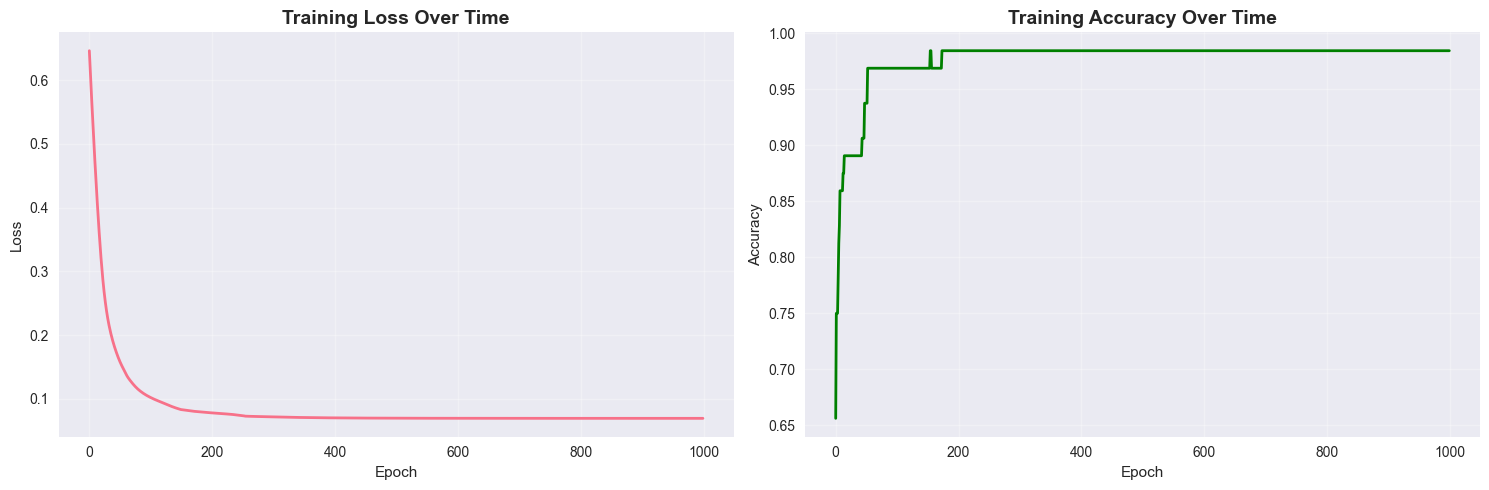

📊 Final Training Metrics:
   Loss: 0.0693
   Accuracy: 0.9844


In [16]:
# Visualize training progress
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot loss
ax1.plot(losses, linewidth=2)
ax1.set_title("Training Loss Over Time", fontsize=14, fontweight="bold")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.grid(True, alpha=0.3)

# Plot accuracy
ax2.plot(accuracies, linewidth=2, color="green")
ax2.set_title("Training Accuracy Over Time", fontsize=14, fontweight="bold")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Final Training Metrics:")
print(f"   Loss: {losses[-1]:.4f}")
print(f"   Accuracy: {accuracies[-1]:.4f}")

## Evaluating the Model

Training accuracy is great, but what we really care about is **test accuracy** - how well does our model perform on data it has never seen?

Let's test our model!


In [17]:
# Evaluate on test set
model.eval()  # Set to evaluation mode (important for some layers like dropout)

with torch.no_grad():  # Don't compute gradients during evaluation
    # Make predictions
    y_pred_test = model(X_test_tensor)

    # Calculate test loss
    test_loss = criterion(y_pred_test, y_test_tensor)

    # Calculate test accuracy
    test_predictions = (y_pred_test > 0.5).float()
    test_accuracy = (test_predictions == y_test_tensor).float().mean()

print("Test Set Evaluation:")
print("=" * 50)
print(f"Test Loss: {test_loss.item():.4f}")
print(f"Test Accuracy: {test_accuracy.item():.4f}")

# Show some predictions
print("\nSample Predictions:")
print("-" * 70)
print("Sample | True | Predicted Prob | Predicted Class | Correct?")
print("-" * 70)

for i in range(min(10, len(X_test))):
    true_label = y_test_tensor[i].item()
    pred_prob = y_pred_test[i].item()
    pred_class = test_predictions[i].item()
    correct = "✅" if pred_class == true_label else "❌"

    print(
        f"  {i+1:2d}   |  {int(true_label)}   |     {pred_prob:.3f}      |        {int(pred_class)}        |   {correct}"
    )

Test Set Evaluation:
Test Loss: 0.0125
Test Accuracy: 1.0000

Sample Predictions:
----------------------------------------------------------------------
Sample | True | Predicted Prob | Predicted Class | Correct?
----------------------------------------------------------------------
   1   |  0   |     0.000      |        0        |   ✅
   2   |  0   |     0.003      |        0        |   ✅
   3   |  0   |     0.036      |        0        |   ✅
   4   |  0   |     0.001      |        0        |   ✅
   5   |  1   |     1.000      |        1        |   ✅
   6   |  1   |     1.000      |        1        |   ✅
   7   |  0   |     0.000      |        0        |   ✅
   8   |  0   |     0.003      |        0        |   ✅
   9   |  1   |     0.983      |        1        |   ✅
  10   |  0   |     0.029      |        0        |   ✅


## Making Predictions on New Data

Now let's use our trained model to predict whether new students will pass!


In [18]:
# Create some hypothetical students
new_students = pd.DataFrame(
    [
        {
            "hours_studied": 5,
            "previous_knowledge": 3,
            "sleep_hours": 5,
            "stress_level": 9,
        },  # Likely to fail
        {
            "hours_studied": 25,
            "previous_knowledge": 8,
            "sleep_hours": 8,
            "stress_level": 2,
        },  # Likely to pass
        {
            "hours_studied": 15,
            "previous_knowledge": 6,
            "sleep_hours": 7,
            "stress_level": 5,
        },  # Borderline
        {
            "hours_studied": 30,
            "previous_knowledge": 9,
            "sleep_hours": 9,
            "stress_level": 1,
        },  # Very likely to pass
        {
            "hours_studied": 3,
            "previous_knowledge": 2,
            "sleep_hours": 4,
            "stress_level": 10,
        },  # Very likely to fail
    ]
)

print("New Students to Predict:")
print("=" * 80)
print(new_students)
print()

# Prepare data (same preprocessing as training)
new_students_scaled = scaler.transform(new_students.values)
new_students_tensor = torch.FloatTensor(new_students_scaled)

# Make predictions
model.eval()
with torch.no_grad():
    predictions = model(new_students_tensor)
    predicted_classes = (predictions > 0.5).float()

# Display results
print("\nPredictions:")
print("=" * 80)
print("Student | Hours | Knowledge | Sleep | Stress | Probability | Prediction")
print("-" * 80)

for i in range(len(new_students)):
    row = new_students.iloc[i]
    prob = predictions[i].item()
    pred = "PASS ✅" if predicted_classes[i].item() == 1 else "FAIL ❌"

    print(
        f"   {i+1}    |  {row['hours_studied']:2.0f}   |     {row['previous_knowledge']:2.0f}    |   {row['sleep_hours']:2.0f}  |   {row['stress_level']:2.0f}   |   {prob:.3f}    | {pred}"
    )

New Students to Predict:
   hours_studied  previous_knowledge  sleep_hours  stress_level
0              5                   3            5             9
1             25                   8            8             2
2             15                   6            7             5
3             30                   9            9             1
4              3                   2            4            10


Predictions:
Student | Hours | Knowledge | Sleep | Stress | Probability | Prediction
--------------------------------------------------------------------------------
   1    |   5   |      3    |    5  |    9   |   0.002    | FAIL ❌
   2    |  25   |      8    |    8  |    2   |   0.999    | PASS ✅
   3    |  15   |      6    |    7  |    5   |   0.858    | PASS ✅
   4    |  30   |      9    |    9  |    1   |   1.000    | PASS ✅
   5    |   3   |      2    |    4  |   10   |   0.000    | FAIL ❌


## Understanding What the Model Learned

Let's examine the weights to see what the model considers important!


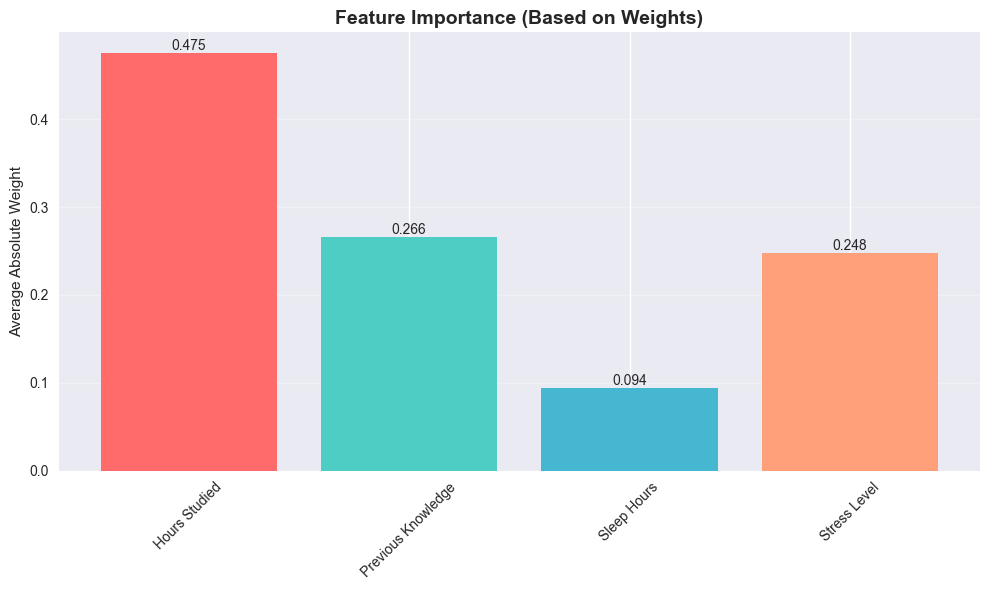

💡 Feature Importance Ranking:
1. Hours Studied: 0.475
2. Previous Knowledge: 0.266
3. Stress Level: 0.248
4. Sleep Hours: 0.094


In [19]:
# Get the weights from the first layer
first_layer_weights = model.hidden.weight.data.numpy()

# Calculate average absolute weight for each input feature
feature_importance = np.abs(first_layer_weights).mean(axis=0)
features = ["Hours Studied", "Previous Knowledge", "Sleep Hours", "Stress Level"]

# Visualize feature importance
plt.figure(figsize=(10, 6))
bars = plt.bar(
    features, feature_importance, color=["#FF6B6B", "#4ECDC4", "#45B7D1", "#FFA07A"]
)
plt.title("Feature Importance (Based on Weights)", fontsize=14, fontweight="bold")
plt.ylabel("Average Absolute Weight")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis="y")

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{height:.3f}",
        ha="center",
        va="bottom",
    )

plt.tight_layout()
plt.show()

print("💡 Feature Importance Ranking:")
print("=" * 50)
sorted_indices = np.argsort(feature_importance)[::-1]
for i, idx in enumerate(sorted_indices, 1):
    print(f"{i}. {features[idx]}: {feature_importance[idx]:.3f}")

## Practice Exercises 🏋️

Now it's your turn to practice! Try these exercises to solidify your understanding.

### Exercise 1: Experiment with Architecture

Create a deeper neural network with:

- Input layer: 4 neurons
- Hidden layer 1: 16 neurons
- Hidden layer 2: 8 neurons
- Output layer: 1 neuron

Train it and compare the performance to our original model.


In [19]:
# Your code here
class DeeperModel(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO: Define layers
        pass

    def forward(self, x):
        # TODO: Implement forward pass
        pass


# TODO: Create model, train it, and evaluate

<details>
<summary>Click to see solution</summary>

```python
class DeeperModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(4, 16)
        self.hidden2 = nn.Linear(16, 8)
        self.output = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.sigmoid(self.output(x))
        return x

deeper_model = DeeperModel()
optimizer = optim.Adam(deeper_model.parameters(), lr=0.01)
criterion = nn.BCELoss()

# Train for 1000 epochs (same as before)
for epoch in range(1000):
    y_pred = deeper_model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Evaluate
deeper_model.eval()
with torch.no_grad():
    test_pred = deeper_model(X_test_tensor)
    test_acc = ((test_pred > 0.5).float() == y_test_tensor).float().mean()
    print(f"Deeper Model Test Accuracy: {test_acc.item():.4f}")
```

</details>


### Exercise 2: Try Different Activation Functions

Modify the model to use:

1. Tanh instead of ReLU in hidden layers
2. Leaky ReLU instead of ReLU

Compare the performance!


In [20]:
# Your code here - try Tanh
model_tanh = nn.Sequential(
    nn.Linear(4, 8),
    # TODO: Use Tanh activation
    nn.Linear(8, 1),
    nn.Sigmoid(),
)

# Your code here - try Leaky ReLU
model_leaky = nn.Sequential(
    nn.Linear(4, 8),
    # TODO: Use LeakyReLU activation
    nn.Linear(8, 1),
    nn.Sigmoid(),
)

# TODO: Train both and compare

<details>
<summary>Click to see solution</summary>

```python
# Tanh model
model_tanh = nn.Sequential(
    nn.Linear(4, 8),
    nn.Tanh(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)

# Leaky ReLU model
model_leaky = nn.Sequential(
    nn.Linear(4, 8),
    nn.LeakyReLU(0.01),
    nn.Linear(8, 1),
    nn.Sigmoid()
)

# Train and compare (same training loop for both)
```

</details>


### Exercise 3: Experiment with Learning Rates

Train three models with different learning rates:

- 0.001 (small)
- 0.01 (medium)
- 0.1 (large)

Plot the training loss for all three and observe the differences!


In [21]:
# Your code here
learning_rates = [0.001, 0.01, 0.1]

# TODO: Train models with different learning rates and plot the results

### Exercise 4: Save and Load Your Model

Learn how to save your trained model and load it later!

Hint: Use `torch.save()` and `torch.load()`


In [22]:
# Your code here

# TODO: Save the model
# torch.save(model.state_dict(), 'student_exam_model.pth')

# TODO: Load the model
# loaded_model = StudentExamPredictor()
# loaded_model.load_state_dict(torch.load('student_exam_model.pth'))

# TODO: Test that the loaded model works

## Summary & What's Next

Congratulations! You've built and trained your first neural network! 🎉

### What You Learned:

1. **What neural networks are**: Pattern recognizers that learn from data
2. **Neural network architecture**: Input → Hidden → Output layers
3. **Activation functions**: Add non-linearity (ReLU, Sigmoid, Tanh)
4. **Building networks with PyTorch**:
   - Using `nn.Sequential` for simple architectures
   - Using `nn.Module` for custom, flexible models
5. **Training process**:
   - Forward pass → Calculate loss → Backward pass → Update weights
6. **Loss functions**: Binary Cross-Entropy for classification
7. **Optimizers**: Adam for efficient weight updates
8. **Evaluation**: Testing on unseen data
9. **Making predictions**: Using trained models on new data

### Key Takeaways:

✅ Neural networks learn by adjusting weights based on errors

✅ Activation functions are essential for learning complex patterns

✅ PyTorch makes building neural networks easy and efficient

✅ Always evaluate on test data to check generalization

✅ Deeper networks can learn more complex patterns (but be careful of overfitting!)

✅ The training loop is simple: forward → loss → backward → update

### What's Next?

In the next notebook, you'll learn:

- **Building more complex models**
- **Different types of layers** (Dropout, Batch Normalization)
- **Preventing overfitting** (Regularization techniques)
- **Advanced optimizers** (Adam variants, learning rate schedulers)
- **Working with real-world datasets**

Keep practicing and experimenting! 🚀
